Natural Language Processing

Feature Extraction
bag of words, word2vec, TF-IDF, BERT Embedding

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier

In [3]:
df=pd.read_csv('/content/sample_data/Language Detection.csv')
df

FileNotFoundError: ignored

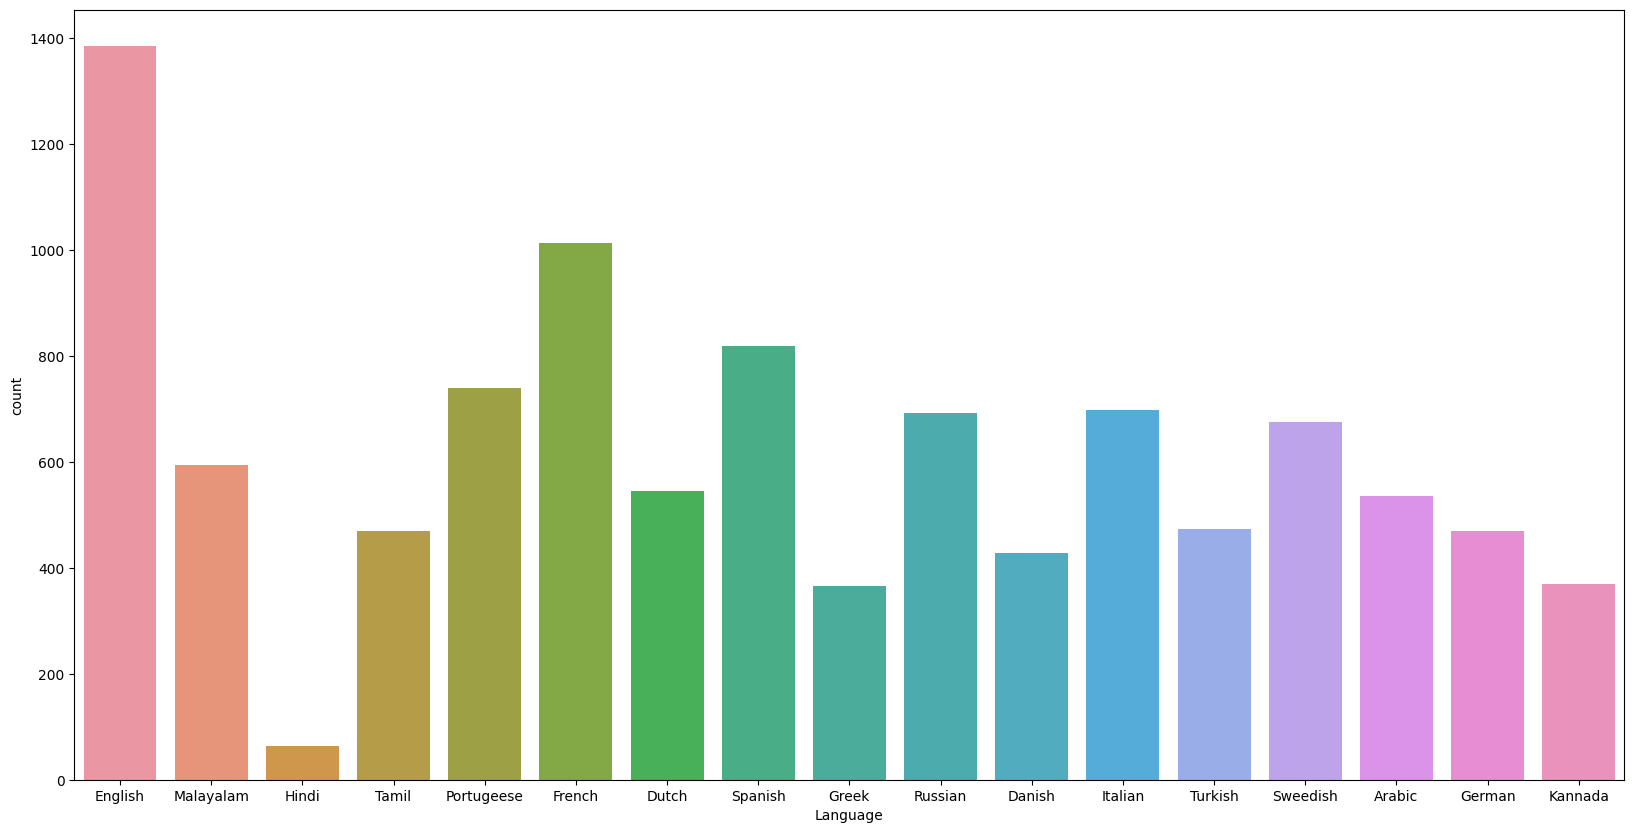

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(x='Language',data=df)
plt.show()

In [ ]:
df['Language'].unique()

array(['English', 'Malayalam', 'Hindi', 'Tamil', 'Portugeese', 'French',
       'Dutch', 'Spanish', 'Greek', 'Russian', 'Danish', 'Italian',
       'Turkish', 'Sweedish', 'Arabic', 'German', 'Kannada'], dtype=object)

In [ ]:
from nltk.corpus import stopwords
import nltk

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
text=" ".join(['Hi','Hello'])
text

'Hi Hello'

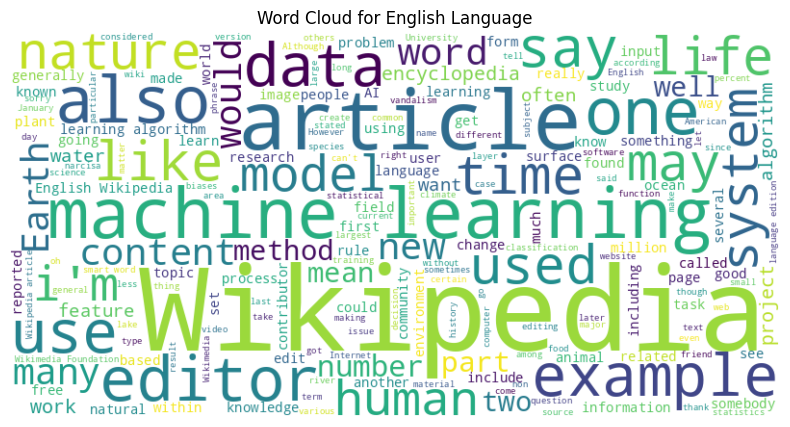

In [ ]:
text=" ".join(df[df['Language']=='English']['Text'])
wordcloud=WordCloud(width=800, height=400,background_color='white',
                    stopwords=set(stopwords.words('english'))).generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud,interpolation='bilinear')
plt.title("Word Cloud for English Language")
plt.axis('off')
plt.show()

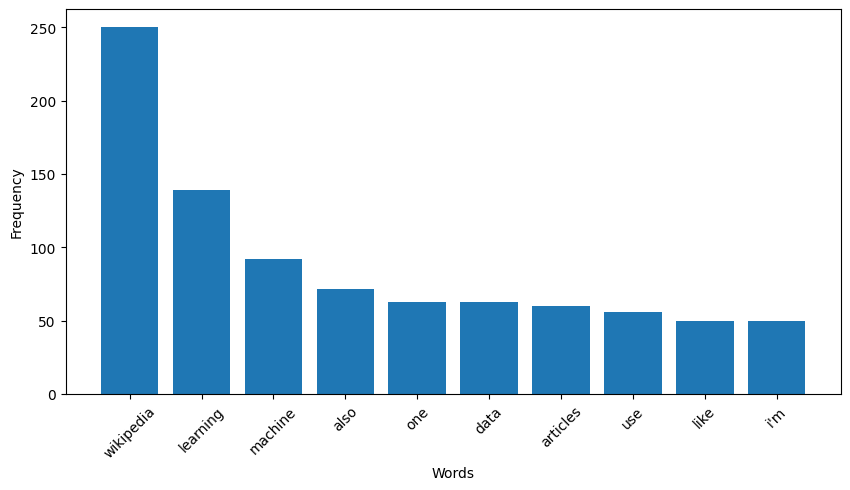

In [ ]:
text=" ".join(df[df['Language']=='English']['Text'])
text=text.lower()
words=text.split()
words=[word for word in words if word not in set(stopwords.words('english'))]
word_freq=nltk.FreqDist(words)
common_words=word_freq.most_common(10)

x_values,y_values=zip(*common_words)
plt.figure(figsize=(10,5))

plt.bar(x_values,y_values)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

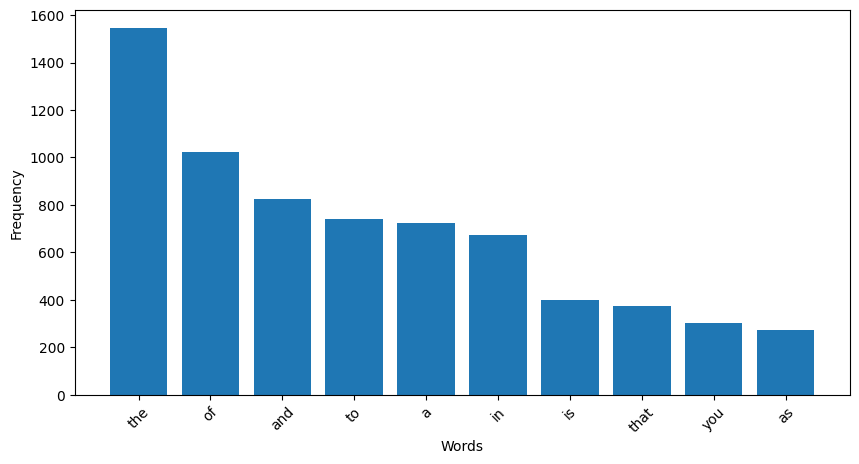

In [ ]:
text=" ".join(df[df['Language']=='English']['Text'])
text=text.lower()
words=text.split()
# words=[word for word in words if word not in set(stopwords.words('english'))]
word_freq=nltk.FreqDist(words)
common_words=word_freq.most_common(10)

x_values,y_values=zip(*common_words)
plt.figure(figsize=(10,5))

plt.bar(x_values,y_values)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [ ]:
common_words

[('wikipedia', 250),
 ('learning', 139),
 ('machine', 92),
 ('also', 72),
 ('one', 63),
 ('data', 63),
 ('articles', 60),
 ('use', 56),
 ('like', 50),
 ("i'm", 50)]

In [ ]:
x=np.array(df['Text'])
y=np.array(df['Language'])

cv=CountVectorizer(lowercase=True)
X=cv.fit_transform(x)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [ ]:
print(X.toarray()[0])
fn=cv.get_feature_names_out()
print(fn)
fn.shape

[0 0 0 ... 0 0 0]
['00' '000' '000க' ... 'ൾക' 'ൾപ' 'ൾമ']


(39928,)

In [ ]:
dt=DecisionTreeClassifier(random_state=42)
dt.fit(X_train,y_train)
dt.score(X_test,y_test)

0.8660541586073501

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100,random_state=42)
rf.fit(X_train,y_train)
rf.score(X_test,y_test)

0.9240812379110251

In [ ]:
model=MultinomialNB(alpha=0.05)
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.9840425531914894

In [ ]:
user=input("Enter sentences:")
ans=np.array([user])
enc_ans=cv.transform(ans)
output=model.predict(enc_ans)
print('The detected language is :',output[0])

Enter sentences:v
The detected language is : English
